In [87]:
import numpy as numpy
import pandas as pd

In [88]:
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [89]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

df['content'] = df['content'].apply(remove_punctuation)

print(df['content'].head())

0    tiffanylue i know  i was listenin to bad habit...
1    Layin n bed with a headache  ughhhhwaitin on y...
2                        Funeral ceremonygloomy friday
3                  wants to hang out with friends SOON
4    dannycastillo We want to trade with someone wh...
Name: content, dtype: object


In [90]:
new_labels = {
    'anger': 0,
    'boredom': 1,
    'empty': 2,
    'enthusiasm': 3,
    'fun': 4,
    'happiness': 5,
    'hate': 6,
    'love': 7,
    'neutral': 8,
    'relief': 9,
    'sadness': 10,
    'surprise': 11,
    'worry': 12
}

# Encode labels
df['sentiment'] = df['sentiment'].map(new_labels)
df.head(10)


,tweet_id,sentiment,content
0,1956967341,2,tiffanylue i know i was listenin to bad habit...
1,1956967666,10,Layin n bed with a headache ughhhhwaitin on y...
2,1956967696,10,Funeral ceremonygloomy friday
3,1956967789,3,wants to hang out with friends SOON
4,1956968416,8,dannycastillo We want to trade with someone wh...
5,1956968477,12,Repinging ghostridah14 why didnt you go to pro...
6,1956968487,10,I should be sleep but im not thinking about an...
7,1956968636,12,Hmmm httpwwwdjherocom is down
8,1956969035,10,charviray Charlene my love I miss you
9,1956969172,10,kelcouch Im sorry at least its Friday


NO 1

In [91]:
#Case Folding

df['content'] = df['content'].str.lower()

print('Case FOlding Result : \n')
print(df['content'].head)
print('\n\n\n')

Case FOlding Result : 

<bound method NDFrame.head of 0        tiffanylue i know  i was listenin to bad habit...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        dannycastillo we want to trade with someone wh...
                               ...                        
39995                                      johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    niariley wassup beautiful follow me  peep out ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: content, Length: 40000, dtype: object>






In [92]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['content'] = df['content'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['content'] = df['content'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['content'] = df['content'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['content'] = df['content'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['content'] = df['content'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['content'] = df['content'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

print('Tokenizing Result : \n') 
df['content'].apply(word_tokenize_wrapper)




Tokenizing Result : 



0        [tiffanylue, know, was, listenin, to, bad, hab...
1        [layin, bed, with, headache, ughhhhwaitin, on,...
2                        [funeral, ceremonygloomy, friday]
3              [wants, to, hang, out, with, friends, soon]
4        [dannycastillo, we, want, to, trade, with, som...
                               ...                        
39995                                    [johnlloydtaylor]
39996                 [happy, mothers, day, all, my, love]
39997    [happy, mothers, day, to, all, the, mommies, o...
39998    [niariley, wassup, beautiful, follow, me, peep...
39999    [mopedronin, bullet, train, from, tokyo, the, ...
Name: content, Length: 40000, dtype: object

In [93]:
# PROSES FILTERING (Stopword Removal)
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('english')

# # convert list to dictionary
# list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['content'].apply(stopwords_removal) 
print('Filtering Result : \n') 
df['content'].head()


Filtering Result : 



0    tiffanylue  know  was listenin to bad habit ea...
1    layin  bed with  headache ughhhhwaitin on your...
2                        funeral ceremonygloomy friday
3                  wants to hang out with friends soon
4    dannycastillo we want to trade with someone wh...
Name: content, dtype: object

In [94]:
# Stemming
from nltk.stem.porter import PorterStemmer
import nltk
porter_stemmer = PorterStemmer()

# Mengubah semua kata ke dalam bentuk dasar
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['content']

0        tiffanylue  know  was listenin to bad habit ea...
1        layin  bed with  headache ughhhhwaitin on your...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        dannycastillo we want to trade with someone wh...
                               ...                        
39995                                      johnlloydtaylor
39996                        happy mothers day all my love
39997    happy mothers day to all the mommies out there...
39998    niariley wassup beautiful follow me peep out m...
39999    mopedronin bullet train from tokyo the gf and ...
Name: content, Length: 40000, dtype: object

In [95]:
# Menampilkan data mentah
print("Before\n")
print(df['content'].head())

# Memanggil semua fungsi yang telah dibuat sebelumnya
def preprocessing(text):
    # Case folding
    remove_tweet_special(text)
    remove_number(text)
    remove_punctuation(text)
    remove_whitespace_LT(text)
    remove_whitespace_multiple(text)
    remove_singl_char(text)
    word_tokenize_wrapper(text)
    # Filtering
    stopwords_removal(text)
    # Stemming
    text = stemmer(text)
    return text

# Menampilkan hasil setelah dilakukan pre-processing data
df['after_processing'] = df['content'].apply(preprocessing)
print("\nAfter\n")
print(df['after_processing'].head())

Before

0    tiffanylue  know  was listenin to bad habit ea...
1    layin  bed with  headache ughhhhwaitin on your...
2                        funeral ceremonygloomy friday
3                  wants to hang out with friends soon
4    dannycastillo we want to trade with someone wh...
Name: content, dtype: object

After

0    tiffanylu know wa listenin to bad habit earlie...
1     layin bed with headach ughhhhwaitin on your call
2                          funer ceremonygloomi friday
3                    want to hang out with friend soon
4    dannycastillo we want to trade with someon who...
Name: after_processing, dtype: object


NO 2

In [127]:
# Import TextBlog Package
from textblob import TextBlob

# Membuat fungsi untuk menghitung polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['after_processing'].apply(get_polarity)


def condition(c):
    if c > 0:
        return "Positif"
    elif c == 0:
        return "Netral"
    else:
        return 'Negatif'

df['clustering'] = df['polarity'].apply(condition)
df.head(10)

,tweet_id,sentiment,content,after_processing,sentiment_analyser,compound_score,compound_score_sentiment,polarity,clustering,labeling
0,1956967341,"(-0.3499999999999999, 0.5833333333333333)",tiffanylue know was listenin to bad habit ea...,tiffanylu know wa listenin to bad habit earlie...,"{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'comp...",-0.5423,Negative,-0.350000,Negatif,-1
1,1956967666,"(0.0, 0.0)",layin bed with headache ughhhhwaitin on your...,layin bed with headach ughhhhwaitin on your call,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,0.000000,Netral,0
2,1956967696,"(0.0, 0.0)",funeral ceremonygloomy friday,funer ceremonygloomi friday,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.3612,Negative,0.000000,Netral,0
3,1956967789,"(0.2, 0.1)",wants to hang out with friends soon,want to hang out with friend soon,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.4767,Positive,0.000000,Netral,0
4,1956968416,"(0.0, 0.0)",dannycastillo we want to trade with someone wh...,dannycastillo we want to trade with someon who...,"{'neg': 0.165, 'neu': 0.767, 'pos': 0.068, 'co...",-0.3919,Negative,0.000000,Netral,0
5,1956968477,"(0.0, 0.0)",repinging ghostridah why didnt you go to prom ...,reping ghostridah whi didnt you go to prom bc ...,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",-0.5667,Negative,0.000000,Netral,0
6,1956968487,"(0.18333333333333335, 0.18333333333333335)",should be sleep but im not thinking about an ...,should be sleep but im not think about an old ...,"{'neg': 0.248, 'neu': 0.578, 'pos': 0.175, 'co...",-0.5267,Negative,0.100000,Positif,1
7,1956968636,"(-0.15555555555555559, 0.2888888888888889)",hmmm httpwwwdjherocom is down,hmmm httpwwwdjherocom is down,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,-0.155556,Negatif,-1
8,1956969035,"(0.5, 0.6)",charviray charlene my love miss you,charviray charlen my love miss you,"{'neg': 0.163, 'neu': 0.408, 'pos': 0.429, 'co...",0.5574,Positive,0.500000,Positif,1
9,1956969172,"(-0.4, 0.7)",kelcouch im sorry at least its friday,kelcouch im sorri at least it friday,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'comp...",-0.0772,Negative,-0.300000,Negatif,-1


NO 3

In [98]:
# Labeling sentiment_cluster and make new column with name labeling from sentiment_cluster
df['labeling'] = df['clustering'].map({'Positif': 1, 'Netral': 0, 'Negatif': -1})
df.head(10)

,tweet_id,sentiment,content,after_processing,sentiment_analyser,compound_score,compound_score_sentiment,polarity,clustering,labeling
0,1956967341,"(-0.3499999999999999, 0.5833333333333333)",tiffanylue know was listenin to bad habit ea...,tiffanylu know wa listenin to bad habit earlie...,"{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'comp...",-0.5423,Negative,-0.350000,Negatif,-1
1,1956967666,"(0.0, 0.0)",layin bed with headache ughhhhwaitin on your...,layin bed with headach ughhhhwaitin on your call,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,0.000000,Netral,0
2,1956967696,"(0.0, 0.0)",funeral ceremonygloomy friday,funer ceremonygloomi friday,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.3612,Negative,0.000000,Netral,0
3,1956967789,"(0.2, 0.1)",wants to hang out with friends soon,want to hang out with friend soon,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.4767,Positive,0.000000,Netral,0
4,1956968416,"(0.0, 0.0)",dannycastillo we want to trade with someone wh...,dannycastillo we want to trade with someon who...,"{'neg': 0.165, 'neu': 0.767, 'pos': 0.068, 'co...",-0.3919,Negative,0.000000,Netral,0
5,1956968477,"(0.0, 0.0)",repinging ghostridah why didnt you go to prom ...,reping ghostridah whi didnt you go to prom bc ...,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",-0.5667,Negative,0.000000,Netral,0
6,1956968487,"(0.18333333333333335, 0.18333333333333335)",should be sleep but im not thinking about an ...,should be sleep but im not think about an old ...,"{'neg': 0.248, 'neu': 0.578, 'pos': 0.175, 'co...",-0.5267,Negative,0.100000,Positif,1
7,1956968636,"(-0.15555555555555559, 0.2888888888888889)",hmmm httpwwwdjherocom is down,hmmm httpwwwdjherocom is down,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,-0.155556,Negatif,-1
8,1956969035,"(0.5, 0.6)",charviray charlene my love miss you,charviray charlen my love miss you,"{'neg': 0.163, 'neu': 0.408, 'pos': 0.429, 'co...",0.5574,Positive,0.500000,Positif,1
9,1956969172,"(-0.4, 0.7)",kelcouch im sorry at least its friday,kelcouch im sorri at least it friday,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'comp...",-0.0772,Negative,-0.300000,Negatif,-1


NO 4

In [104]:
# Split Data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(df["after_processing"])
y = df["labeling"]

In [105]:
#Split Data Training dan Data Testing
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [107]:
#Training And Evaluating Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,classification_report

# C-Support Vector Classification
model = SVC()

# Trainingg
model.fit(X,y)

#prediksi data testing
y_pred_test = model.predict(X_test)

#prediksi data training
y_pred_train = model.predict(X_train)  

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 0.9918571428571429
Hasil akurasi data test: 0.9939166666666667


In [144]:
# Buat Clasification menggunakan naive bayes dan vectorizer menggunakan TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['after_processing'], df['labeling'], test_size=0.2, random_state=42)

# Vectorizer
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
label = {1: 'Positif', 0: 'Neutral', -1: 'Negatif'}
y_test = y_test.map(label)
y_pred = pd.Series(y_pred).map(label)

no 5

In [147]:
# Membuat data baru
# Total 6 data
data_baru = [
    'hello everyone I like to eat and travel',
    'i am so happy today',
    'yesterday I was very sad'
]

# Vectorizer
data_baru = tfidf.transform(data_baru)

# Prediksi Data
prediksi = model.predict(data_baru)

# Cek Hasil
hasil = pd.Series(prediksi).map(label)
print(hasil)

0    Neutral
1    Neutral
2    Negatif
dtype: object


no 6

In [114]:
from sklearn.metrics import classification_report,precision_score
#menghitung precision
precission = precision_score(y_test, y_pred_test, average='weighted',zero_division=0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      1902
           0       1.00      0.99      1.00      5619
           1       0.99      1.00      0.99      4479

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



Text(50.722222222222214, 0.5, 'True')

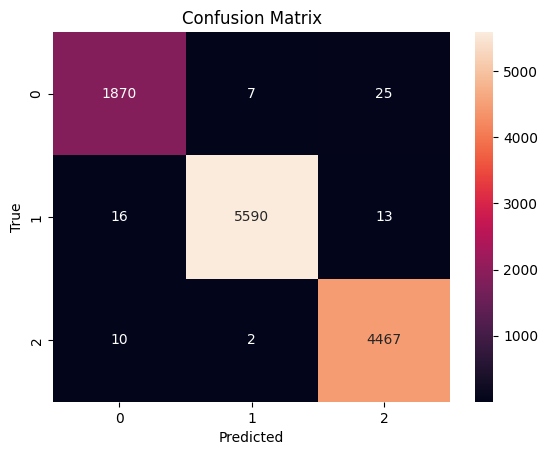

In [113]:
#Menampilkan detail dari hasil prediksi yang diberikan oleh classification model yang kita buat dengan confusion matrix
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')